In [121]:
import pandas as pd
from matplotlib import pyplot as plt

In [97]:
df= pd.read_csv("shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [99]:
df.shape

(60, 3)

In [101]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


Nike Analysis

In [32]:
df_nike=df[df["brand"]=='Nike']
df_nike.shape

(30, 3)

In [36]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [164]:
val = round(df_nike.sold_qty.mean())          
val

20

In [44]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [150]:
df.sold_qty.fillna(val,inplace=True)

C:\Users\omkar\AppData\Local\Temp\ipykernel_2364\2660393460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sold_qty.fillna(val,inplace=True)


In [148]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty


In [107]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [71]:
df_nike.sold_qty.sum()

590.0

### Adidas Analysis

In [57]:
df_adidas=df[df["brand"]=='Adidas']
df_adidas.shape

(30, 3)

In [59]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [166]:
[df_adidas.sold_qty.median()]

[12.0]

In [168]:
df_adidas.sold_qty.sum()

367.0

In [77]:
df_adidas.sold_qty.quantile([0.95])

0.95    18.55
Name: sold_qty, dtype: float64

In [79]:
df_adidas[df_adidas.sold_qty>18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


In [156]:
def plot_daily_sales(df):
    # Ensure the date column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Group data by date and brand, summing the sold_quantity
    grouped = df.groupby(['date', 'brand'])['sold_qty'].sum().reset_index()

    # Pivot the table for easier plotting
    pivoted = grouped.pivot(index='date', columns='brand', values='sold_qty').fillna(0)

    # Plot the data
    plt.figure(figsize=(12, 6))
    for brand in ['Nike', 'Adidas']:
        if brand in pivoted.columns:
            plt.plot(pivoted.index, pivoted[brand], label=brand, marker='o')

    # Customize the plot
    plt.title('Daily Sales of Nike and Adidas', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sold Quantity', fontsize=12)
    plt.legend(title="Brand")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

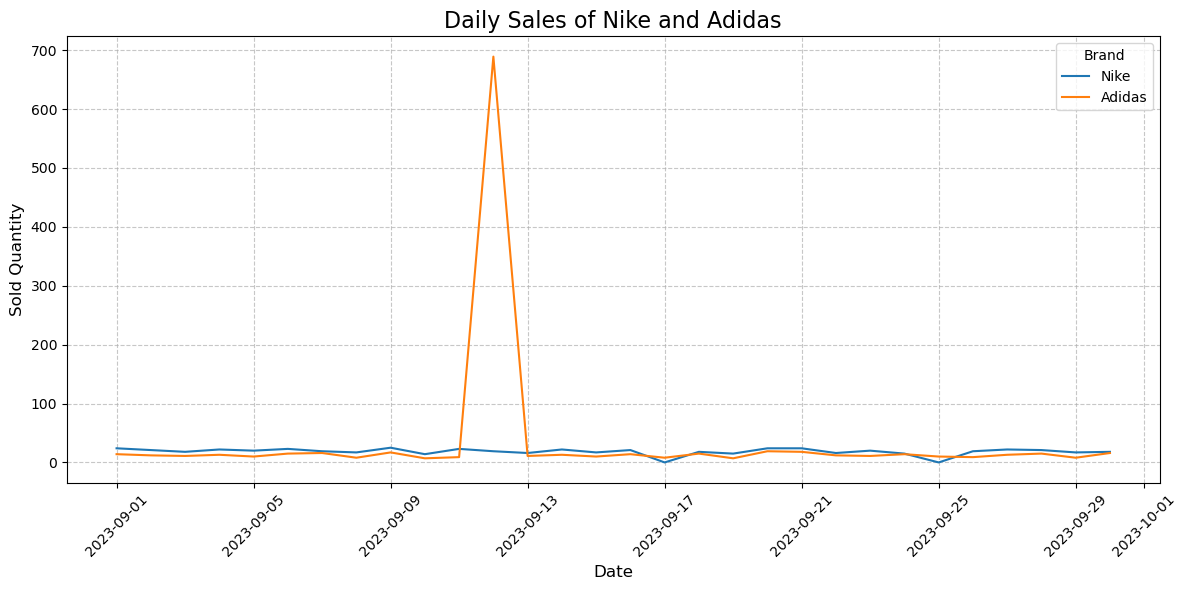

In [132]:
plot_daily_sales(df)

In [160]:
val = round(df_adidas.sold_qty.median())   # median to treat outlier

In [142]:
df.sold_qty.replace(689, val,inplace=True)

C:\Users\omkar\AppData\Local\Temp\ipykernel_2364\3241112144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sold_qty.replace(689, val,inplace=True)


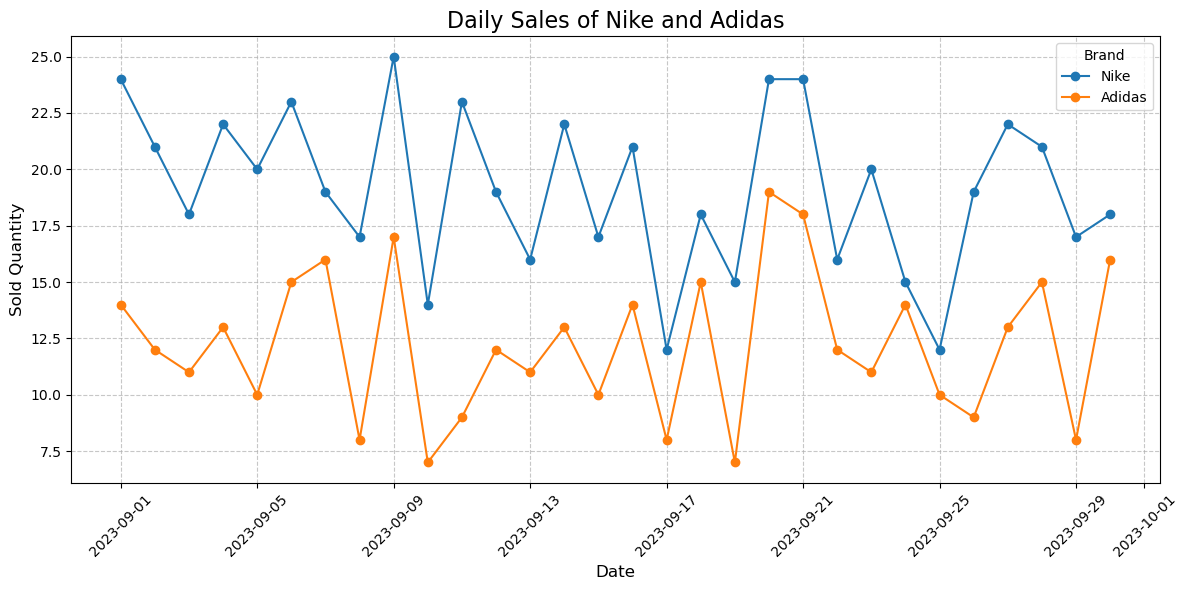

In [158]:
plot_daily_sales(df)

In [176]:
df[df['brand'] == 'Nike'].sold_qty.sum()

574.0

In [182]:
df[df['brand'] == 'Adidas'].sold_qty.sum()

367.0

In [186]:
df[df['brand'] == 'Nike'].sold_qty.mean()

19.133333333333333

In [188]:
df[df['brand'] == 'Nike'].sold_qty.max()

25.0

In [190]:
df[df['brand'] == 'Nike'].sold_qty.min()

12.0

In [192]:
df[df['brand'] == 'Adidas'].sold_qty.min()

7.0

In [194]:
df[df['brand'] == 'Adidas'].sold_qty.max()

19.0

In [196]:
df[df['brand'] == 'Adidas'].sold_qty.sum()

367.0

END